In [9]:
from pathlib import Path
import pandas as pd

# --- HARD ANCHOR TO REPO ROOT ---
CWD = Path.cwd().resolve()

ROOT = None
for p in CWD.parents:
    if p.name == "accountable-interpretation":
        ROOT = p
        break

assert ROOT is not None, f"Repo root not found from {CWD}"

print("✅ CWD :", CWD)
print("✅ ROOT:", ROOT)

# --- LOAD PHASE 4 SCORED DATA ---
data_path = ROOT / "outputs" / "tables" / "phase4_scored.csv.gz"
print("✅ Looking for:", data_path)

assert data_path.exists(), f"❌ Missing file: {data_path}"

df = pd.read_csv(data_path, compression="gzip", low_memory=False)

print("✅ Loaded df:", df.shape)
print("✅ model_risk_proba present?", "model_risk_proba" in df.columns)


✅ CWD : /Users/sanghati/research/accountable-interpretation/notebooks/notebooks
✅ ROOT: /Users/sanghati/research/accountable-interpretation
✅ Looking for: /Users/sanghati/research/accountable-interpretation/outputs/tables/phase4_scored.csv.gz
✅ Loaded df: (300000, 52)
✅ model_risk_proba present? True


In [10]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)

def find_repo_root(start=None) -> Path:
    start = Path(start or Path.cwd()).resolve()
    for p in [start] + list(start.parents):
        if (p / "outputs").exists() and (p / "notebooks").exists():
            return p
    raise FileNotFoundError("Could not find repo root (expected outputs/ and notebooks/).")

ROOT = find_repo_root()
OUT_DIR = ROOT / "outputs" / "phase5"
OUT_TABLES = OUT_DIR / "tables"
OUT_FIGS = OUT_DIR / "figures"
OUT_TABLES.mkdir(parents=True, exist_ok=True)
OUT_FIGS.mkdir(parents=True, exist_ok=True)

ROOT, OUT_DIR


(PosixPath('/Users/sanghati/research/accountable-interpretation/notebooks'),
 PosixPath('/Users/sanghati/research/accountable-interpretation/notebooks/outputs/phase5'))

In [13]:
from pathlib import Path

CWD = Path.cwd().resolve()
print("CWD:", CWD)

# If you are in .../notebooks/notebooks, go up 2 levels.
# If you are in .../notebooks, go up 1 level.
if CWD.name == "notebooks" and CWD.parent.name == "notebooks":
    ROOT = CWD.parents[1]   # goes to accountable-interpretation
elif CWD.name == "notebooks":
    ROOT = CWD.parent
else:
    ROOT = CWD

print("ROOT:", ROOT)
print("Has outputs?:", (ROOT / "outputs").exists())
print("Has notebooks?:", (ROOT / "notebooks").exists())


CWD: /Users/sanghati/research/accountable-interpretation/notebooks/notebooks
ROOT: /Users/sanghati/research/accountable-interpretation
Has outputs?: True
Has notebooks?: True


In [14]:
import pandas as pd

SCORED_PATH = ROOT / "outputs" / "phase4" / "tables" / "phase4_scored.csv.gz"
print("Looking for:", SCORED_PATH)

assert SCORED_PATH.exists(), f"Missing scored file: {SCORED_PATH}"

df = pd.read_csv(SCORED_PATH, compression="gzip", low_memory=False)
print("Loaded:", df.shape)
df.head(2)


Looking for: /Users/sanghati/research/accountable-interpretation/outputs/phase4/tables/phase4_scored.csv.gz
Loaded: (300000, 52)


,#AlleleID,Type,Name,GeneID,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),nsv/esv (dbVar),RCVaccession,PhenotypeIDS,PhenotypeList,Origin,OriginSimple,Assembly,ChromosomeAccession,Chromosome,Start,Stop,ReferenceAllele,AlternateAllele,Cytogenetic,ReviewStatus,NumberSubmitters,Guidelines,TestedInGTR,OtherIDs,SubmitterCategories,VariationID,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF,SomaticClinicalImpact,SomaticClinicalImpactLastEvaluated,ReviewStatusClinicalImpact,Oncogenicity,OncogenicityLastEvaluated,ReviewStatusOncogenicity,SCVsForAggregateGermlineClassification,SCVsForAggregateSomaticClinicalImpact,SCVsForAggregateOncogenicityClassification,ConfidenceLevel,LastEvaluated_dt,years_since_review,NumberSubmitters_num,conflicting,ReclassificationRiskScore,ReclassificationRiskTier,model_risk_proba,model_risk_tier
0,15041,Indel,NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...,9907,AP5Z1,HGNC:22197,Pathogenic/Likely pathogenic,1,"Dec 17, 2024",397704705,-,RCV000000012|RCV005255549|RCV004998069,"MONDO:MONDO:0013342,MedGen:C3150901,OMIM:61364...",Hereditary spastic paraplegia 48|Macular dystr...,germline;unknown,germline,GRCh37,NC_000007.13,7,4820844,4820847,na,na,7p22.1,"criteria provided, multiple submitters, no con...",4,-,N,"ClinGen:CA215070,OMIM:613653.0001",3,2,4820844,GGAT,TGCTGTAAACTGTAACTGTAAA,-,-,-,-,-,-,SCV001451119|SCV005622007|SCV005909190,-,-,High,2024-12-17,1.054073,4,False,1,Low,0.105657,Low
1,15041,Indel,NM_014855.3(AP5Z1):c.80_83delinsTGCTGTAAACTGTA...,9907,AP5Z1,HGNC:22197,Pathogenic/Likely pathogenic,1,"Dec 17, 2024",397704705,-,RCV000000012|RCV005255549|RCV004998069,"MONDO:MONDO:0013342,MedGen:C3150901,OMIM:61364...",Hereditary spastic paraplegia 48|Macular dystr...,germline;unknown,germline,GRCh38,NC_000007.14,7,4781213,4781216,na,na,7p22.1,"criteria provided, multiple submitters, no con...",4,-,N,"ClinGen:CA215070,OMIM:613653.0001",3,2,4781213,GGAT,TGCTGTAAACTGTAACTGTAAA,-,-,-,-,-,-,SCV001451119|SCV005622007|SCV005909190,-,-,High,2024-12-17,1.054073,4,False,1,Low,0.105657,Low


In [15]:
required = [
    "ClinicalSignificance", "ReviewStatus",
    "years_since_review", "NumberSubmitters_num",
    "conflicting", "model_risk_proba", "model_risk_tier"
]
missing = [c for c in required if c not in df.columns]
print("Missing:", missing)

tier_order = ["Low", "Moderate", "High", "Critical"]
df["model_risk_tier"] = pd.Categorical(df["model_risk_tier"], categories=tier_order, ordered=True)

# Useful flags for clinical framing
df["is_plp"] = df["ClinicalSignificance"].astype(str).str.contains(
    r"Pathogenic|Likely pathogenic", case=False, na=False
)
df["is_high_or_critical"] = df["model_risk_tier"].isin(["High", "Critical"])
df["is_single_submitter"] = pd.to_numeric(df["NumberSubmitters_num"], errors="coerce").le(1)

print("PLP rows:", int(df["is_plp"].sum()))
print("High/Critical rows:", int(df["is_high_or_critical"].sum()))


Missing: []
PLP rows: 151527
High/Critical rows: 83168


In [16]:
from pathlib import Path

OUT_DIR = ROOT / "outputs" / "phase5"
OUT_TABLES = OUT_DIR / "tables"
OUT_FIGS = OUT_DIR / "figures"
OUT_TABLES.mkdir(parents=True, exist_ok=True)
OUT_FIGS.mkdir(parents=True, exist_ok=True)

print("Phase5 tables:", OUT_TABLES)
print("Phase5 figs  :", OUT_FIGS)


Phase5 tables: /Users/sanghati/research/accountable-interpretation/outputs/phase5/tables
Phase5 figs  : /Users/sanghati/research/accountable-interpretation/outputs/phase5/figures


In [17]:
counts = (
    df.groupby(["ClinicalSignificance", "model_risk_tier"], dropna=False)
      .size()
      .reset_index(name="n")
)

counts["pct_within_clinsig"] = counts["n"] / counts.groupby("ClinicalSignificance")["n"].transform("sum")

pivot_n = (counts.pivot_table(
    index="ClinicalSignificance",
    columns="model_risk_tier",
    values="n",
    fill_value=0
).reindex(columns=tier_order))

pivot_p = (counts.pivot_table(
    index="ClinicalSignificance",
    columns="model_risk_tier",
    values="pct_within_clinsig",
    fill_value=0.0
).reindex(columns=tier_order))

summary = pivot_n.copy()
for t in tier_order:
    summary[f"{t}_pct"] = pivot_p[t].round(4)

summary = summary.reset_index()

out_path = OUT_TABLES / "clinical_summary_by_clinsig_and_tier.csv"
summary.to_csv(out_path, index=False)

summary.head(15), out_path


/var/folders/7x/42f5r3c50870bwy_fq7n4v0m0000gn/T/ipykernel_16169/707861963.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["ClinicalSignificance", "model_risk_tier"], dropna=False)
/var/folders/7x/42f5r3c50870bwy_fq7n4v0m0000gn/T/ipykernel_16169/707861963.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_n = (counts.pivot_table(
/var/folders/7x/42f5r3c50870bwy_fq7n4v0m0000gn/T/ipykernel_16169/707861963.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior

(model_risk_tier                        ClinicalSignificance      Low  \
 0                                                         -     70.0   
 1                                                   Affects      0.0   
 2                                                    Benign  20720.0   
 3                                      Benign/Likely benign  24052.0   
 4                         Benign/Likely benign; association      2.0   
 5                       Benign/Likely benign; drug response      2.0   
 6                Benign/Likely benign; drug response; other      4.0   
 7                               Benign/Likely benign; other     22.0   
 8                  Benign/Likely benign; other; risk factor      2.0   
 9                         Benign/Likely benign; risk factor      2.0   
 10                                          Benign; Affects      0.0   
 11                                      Benign; association      0.0   
 12                                    Benign; drug

In [18]:
plp = df[df["is_plp"]].copy()

headline = pd.DataFrame([{
    "subset": "Pathogenic/Likely pathogenic",
    "n_total": int(len(plp)),
    "n_high_or_critical": int(plp["is_high_or_critical"].sum()),
    "pct_high_or_critical": round(float(plp["is_high_or_critical"].mean()), 4),
}])

headline_path = OUT_TABLES / "clinical_headline_plp_high_critical.csv"
headline.to_csv(headline_path, index=False)

headline, headline_path


(                         subset  n_total  n_high_or_critical  \
 0  Pathogenic/Likely pathogenic   151527               41143   
 
    pct_high_or_critical  
 0                0.2715  ,
 PosixPath('/Users/sanghati/research/accountable-interpretation/outputs/phase5/tables/clinical_headline_plp_high_critical.csv'))

In [19]:
candidate_cols = [
    "model_risk_proba", "model_risk_tier",
    "ClinicalSignificance", "ReviewStatus",
    "years_since_review", "NumberSubmitters_num", "conflicting",
    "GeneSymbol", "VariationID", "RCVaccession", "Name", "LastEvaluated",
]
cols = [c for c in candidate_cols if c in df.columns]

topN = 200
top_review = (
    df.sort_values("model_risk_proba", ascending=False)
      .loc[:, cols]
      .head(topN)
      .copy()
)

top_path = OUT_TABLES / "top_review_priority_variants.csv"
top_review.to_csv(top_path, index=False)

top_review.head(20), top_path


(       model_risk_proba model_risk_tier ClinicalSignificance  \
 2825           0.969662        Critical              Affects   
 2824           0.969662        Critical              Affects   
 27887          0.964691        Critical    Pathogenic; other   
 27590          0.963246        Critical                other   
 27591          0.963246        Critical                other   
 27792          0.961589        Critical                other   
 27793          0.961589        Critical                other   
 27980          0.958722        Critical                other   
 27979          0.958722        Critical                other   
 27115          0.953004        Critical           Pathogenic   
 27116          0.953004        Critical           Pathogenic   
 27584          0.949297        Critical                other   
 27585          0.949297        Critical                other   
 28817          0.948151        Critical                other   
 28818          0.948151 

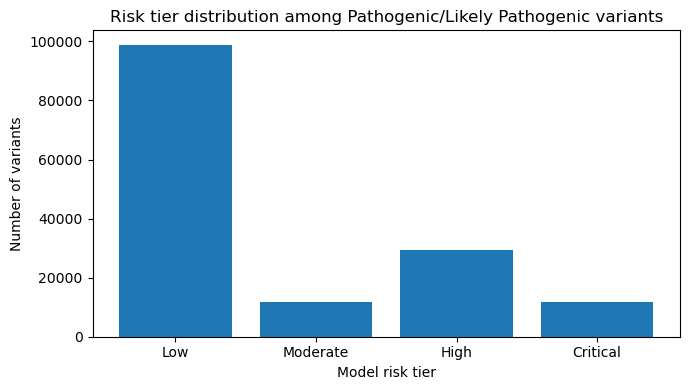

PosixPath('/Users/sanghati/research/accountable-interpretation/outputs/phase5/figures/plp_risk_tier_distribution.png')

In [20]:
import matplotlib.pyplot as plt

tier_counts = plp["model_risk_tier"].value_counts().reindex(tier_order, fill_value=0)

plt.figure(figsize=(7,4))
plt.bar(tier_counts.index.astype(str), tier_counts.values)
plt.title("Risk tier distribution among Pathogenic/Likely Pathogenic variants")
plt.xlabel("Model risk tier")
plt.ylabel("Number of variants")
plt.tight_layout()

fig1 = OUT_FIGS / "plp_risk_tier_distribution.png"
plt.savefig(fig1, dpi=200)
plt.show()

fig1


/var/folders/7x/42f5r3c50870bwy_fq7n4v0m0000gn/T/ipykernel_16169/997837851.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp.groupby("ysr_bin", dropna=False)


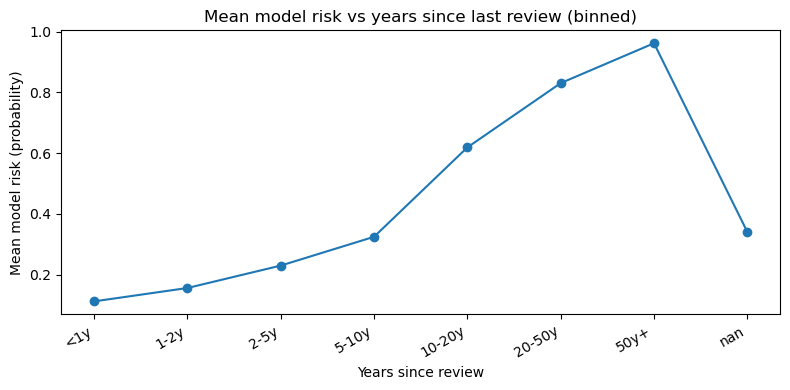

PosixPath('/Users/sanghati/research/accountable-interpretation/outputs/phase5/figures/mean_risk_vs_years_since_review_binned.png')

In [21]:
tmp = df.copy()
tmp["years_since_review"] = pd.to_numeric(tmp["years_since_review"], errors="coerce")

bins = [0, 1, 2, 5, 10, 20, 50, 200]
labels = ["<1y", "1-2y", "2-5y", "5-10y", "10-20y", "20-50y", "50y+"]

tmp["ysr_bin"] = pd.cut(tmp["years_since_review"], bins=bins, labels=labels, include_lowest=True, right=False)

risk_by_bin = (
    tmp.groupby("ysr_bin", dropna=False)
       .agg(n=("model_risk_proba", "size"), mean_risk=("model_risk_proba", "mean"))
       .reset_index()
)

risk_by_bin.to_csv(OUT_TABLES / "risk_by_years_since_review_bin.csv", index=False)

plt.figure(figsize=(8,4))
plt.plot(risk_by_bin["ysr_bin"].astype(str), risk_by_bin["mean_risk"], marker="o")
plt.title("Mean model risk vs years since last review (binned)")
plt.xlabel("Years since review")
plt.ylabel("Mean model risk (probability)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()

fig2 = OUT_FIGS / "mean_risk_vs_years_since_review_binned.png"
plt.savefig(fig2, dpi=200)
plt.show()

fig2


In [22]:
from pathlib import Path

expected = [
    ROOT / "outputs/phase5/tables/clinical_summary_by_clinsig_and_tier.csv",
    ROOT / "outputs/phase5/tables/clinical_headline_plp_high_critical.csv",
    ROOT / "outputs/phase5/tables/top_review_priority_variants.csv",
    ROOT / "outputs/phase5/figures/plp_risk_tier_distribution.png",
    ROOT / "outputs/phase5/figures/mean_risk_vs_years_since_review_binned.png",
]

for p in expected:
    print(("✅" if p.exists() else "❌"), p)


✅ /Users/sanghati/research/accountable-interpretation/outputs/phase5/tables/clinical_summary_by_clinsig_and_tier.csv
✅ /Users/sanghati/research/accountable-interpretation/outputs/phase5/tables/clinical_headline_plp_high_critical.csv
✅ /Users/sanghati/research/accountable-interpretation/outputs/phase5/tables/top_review_priority_variants.csv
✅ /Users/sanghati/research/accountable-interpretation/outputs/phase5/figures/plp_risk_tier_distribution.png
✅ /Users/sanghati/research/accountable-interpretation/outputs/phase5/figures/mean_risk_vs_years_since_review_binned.png
